## Sentiment Analysis on Woman’s E-commerce Clothes Review 

## Import Library

In [1]:
# pip install textblob


In [2]:
# pip install wordcloud


In [3]:
#  !pip install --upgrade nltk


In [4]:
# nltk.download('punkt')


In [5]:
# nltk.download('averaged_perceptron_tagger')


In [6]:
# nltk.download('stopwords')


In [7]:
# pip install imbalanced-learn


In [8]:
# nltk.download('wordnet')


In [9]:
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from sklearn.feature_extraction.text import CountVectorizer
# import pandas as pd

# # Download stopwords dataset
# nltk.download('stopwords')
# nltk.download('punkt')


In [10]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\753693.ADIR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [1]:
# Import Library

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt  # You need this to display the word clouds
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Use tensorflow.keras here
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Bidirectional
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping




In [2]:
import warnings

# To filter out specific warning types
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
#
# Your code here

# Reset warnings filters to their original state if needed
warnings.resetwarnings()

In [13]:
# ! textblob

##  Dataset for the project
In this notebook, I am using data from [Kaggle](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews). It contains a labels data of 23,486 rows and 11 columns Female clothes review 

In [3]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df = data.copy()

In [4]:
# nltk.download('vader_lexicon')

In [5]:
df.head(30)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [6]:
# Check the data shape
df.shape

(23486, 11)

In [7]:
# checking for duplicate
df.duplicated().sum()

0

In [8]:
# Compare the Title details with the review details
df[['Title','Review Text']].head()

,Title,Review Text
0,NaN,Absolutely wonderful - silky and sexy and comf...
1,NaN,Love this dress! it's sooo pretty. i happene...
2,Some major design flaws,I had such high hopes for this dress and reall...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,Flattering shirt,This shirt is very flattering to all due to th...


In [9]:
# Check null value
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [11]:
# Data description
df.describe()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\nanops.py:1723: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=1, interpolation=interpolation)


,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


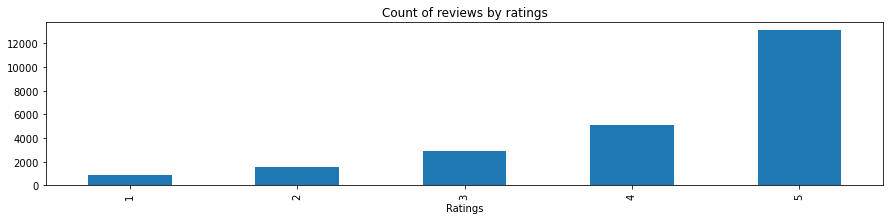

In [12]:
# Plot of count of reviews by rating
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind = 'bar',
      title = 'Count of reviews by ratings',
      figsize = (15,3))
ax.set_xlabel("Ratings")
plt.show()

<AxesSubplot:>

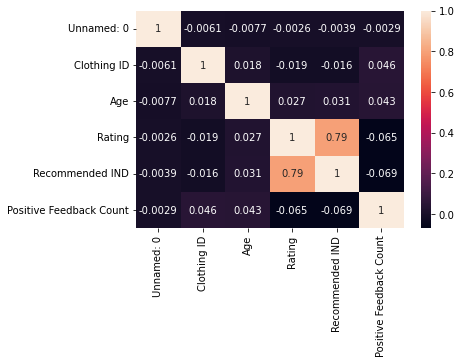

In [13]:
# correlation heatmap
sns.heatmap(df.corr(), annot=True)

## Exploratory Data Analysis

In [14]:
# drop unnamed because its the same with with the index, and Clothing ID because is not needed

df.drop(['Unnamed: 0','Clothing ID'], axis = 1, inplace=True)

In [15]:
# Compare the content of the Review and Title colum
df[['Title','Review Text']].head()

,Title,Review Text
0,NaN,Absolutely wonderful - silky and sexy and comf...
1,NaN,Love this dress! it's sooo pretty. i happene...
2,Some major design flaws,I had such high hopes for this dress and reall...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,Flattering shirt,This shirt is very flattering to all due to th...


In [16]:
# drop title because we can get title information from Review Text

df.drop(['Title'], axis = 1, inplace=True)

In [17]:
df

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [19]:
# dropping all the Null value in all the column
df = df.dropna()
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [22]:
# confirm the rows and columns
df.shape

(22628, 8)

### Text preprocessing 

Text preprocessing is an essential step in natural language processing (NLP) tasks, where the raw text data is transformed and cleaned to make it suitable for further analysis or modeling.

In [ ]:
#https://www.kaggle.com/code/mohanavamsibatchu/final-year-project

In [38]:
# Tokenization -  Breaking down the text into individual words or tokens.
def tokenize_text(df):
    return word_tokenize(df)

df['tokens'] = df['Review Text'].apply(tokenize_text)

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization - Reducing words to their base form
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)


# Part-of-Speech (POS) Tagging - Assigning a grammatical part-of-speech tag
def pos_tagging(tokens):
    return nltk.pos_tag(tokens)

df['pos_tags'] = df['tokens'].apply(pos_tagging)

# Part-of-Speech (POS) Tagging - Assigning a grammatical part-of-speech tag
def pos_tagging(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    adjectives = [word for word, pos in tagged_tokens if any(pos.startswith(prefix) for prefix in ['JJ', 'JJR', 'JJS'])]
    return adjectives

df['adjectives'] = df['tokens'].apply(pos_tagging)


# Trigram and Bigram - Extracting sequences of three and two consecutive tokens
def get_ngrams(tokens, n):
    return list(ngrams(tokens, n))

df['trigrams'] = df['tokens'].apply(lambda tokens: get_ngrams(tokens, 3))
df['bigrams'] = df['tokens'].apply(lambda tokens: get_ngrams(tokens, 2))

# Word Embedding - Creating a dense vector representation of words using pre-trained word embeddings
embedding_dim = 100

def create_embedding_matrix(texts, embedding_dim):
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(texts)
    word_index = tokenizer.word_index
    vocab_size = len(word_index) + 1

    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    for word, i in word_index.items():
        if word in word_embeddings:
            embedding_matrix[i] = word_embeddings[word]

    return embedding_matrix, vocab_size, tokenizer

# Assuming you have pre-trained word embeddings, load them into word_embeddings dictionary
word_embeddings = {'love': np.random.rand(embedding_dim), 'great': np.random.rand(embedding_dim),
                   'not': np.random.rand(embedding_dim), 'good': np.random.rand(embedding_dim),
                   'terrible': np.random.rand(embedding_dim)}

texts = df['Review Text'].tolist()
embedding_matrix, vocab_size, tokenizer = create_embedding_matrix(texts, embedding_dim)

# Bag of Words (BoW) - Converting text into numerical features using a frequency count of words.
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    text = ' '.join([word for word in tokens if word not in stop_words])
    
    return text

df['processed_text'] = df['Review Text'].apply(preprocess_text)

# Vectorize text using BoW representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed_text']).toarray()


C:\Users\753693.ADIR\AppData\Local\Temp\ipykernel_4592\2483417426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['Review Text'].apply(tokenize_text)
C:\Users\753693.ADIR\AppData\Local\Temp\ipykernel_4592\2483417426.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)
C:\Users\753693.ADIR\AppData\Local\Temp\ipykernel_4592\2483417426.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [39]:
# import nltk

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')


In [40]:
# Examine the new created columns
df

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,tokens,lemmatized_tokens,pos_tags,adjectives,trigrams,bigrams,processed_text
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[Absolutely, wonderful, -, silky, and, sexy, a...","[Absolutely, wonderful, -, silky, and, sexy, a...","[(Absolutely, RB), (wonderful, JJ), (-, :), (s...","[wonderful, comfortable]","[(Absolutely, wonderful, -), (wonderful, -, si...","[(Absolutely, wonderful), (wonderful, -), (-, ...",absolutely wonderful silky sexy comfortable
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[Love, this, dress, !, it, 's, sooo, pretty, ....","[Love, this, dress, !, it, 's, sooo, pretty, ....","[(Love, VB), (this, DT), (dress, NN), (!, .), ...","[sooo, i, glad, petite, me-, little, true, pet...","[(Love, this, dress), (this, dress, !), (dress...","[(Love, this), (this, dress), (dress, !), (!, ...",love dress sooo pretty happened find store gla...
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[I, had, such, high, hopes, for, this, dress, ...","[I, had, such, high, hope, for, this, dress, a...","[(I, PRP), (had, VBD), (such, JJ), (high, JJ),...","[such, high, petite, small, usual, i, small, s...","[(I, had, such), (had, such, high), (such, hig...","[(I, had), (had, such), (such, high), (high, h...",high hopes dress really wanted work initially ...
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[I, love, ,, love, ,, love, this, jumpsuit, .,...","[I, love, ,, love, ,, love, this, jumpsuit, .,...","[(I, PRP), (love, VBP), (,, ,), (love, VBP), (...","[fabulous, great]","[(I, love, ,), (love, ,, love), (,, love, ,), ...","[(I, love), (love, ,), (,, love), (love, ,), (...",love love love jumpsuit fun flirty fabulous ev...
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[This, shirt, is, very, flattering, to, all, d...","[This, shirt, is, very, flattering, to, all, d...","[(This, DT), (shirt, NN), (is, VBZ), (very, RB...","[flattering, due, adjustable, perfect]","[(This, shirt, is), (shirt, is, very), (is, ve...","[(This, shirt), (shirt, is), (is, very), (very...",shirt flattering due adjustable front tie perf...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"[I, was, very, happy, to, snag, this, dress, a...","[I, wa, very, happy, to, snag, this, dress, at...","[(I, PRP), (was, VBD), (very, RB), (happy, JJ)...","[happy, great, easy, flattering]","[(I, was, very), (was, very, happy), (very, ha...","[(I, was), (was, very), (very, happy), (happy,...",happy snag dress great price easy slip flatter...
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"[It, reminds, me, of, maternity, clothes, ., s...","[It, reminds, me, of, maternity, clothes, ., s...","[(It, PRP), (reminds, VBZ), (me, PRP), (of, IN...","[soft, stretchy, shiny, nice, long, ok]","[(It, reminds, me), (reminds, me, of), (me, of...","[(It, reminds), (reminds, me), (me, of), (of, ...",reminds maternity clothes soft stretchy shiny ...
23483,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"[This, fit, well, ,, but, the, top, was, very,...","[This, fit, well, ,, but, the, top, wa, very, ...","[(This, DT), (fit, NN), (well, RB), (,, ,), (b...","[see, glad, able, different, great]","[(This, fit, well), (fit, well, ,), (well, ,, ...","[(This, fit), (fit, well), (well, ,), (,, but)...",fit well top see never would worked glad able ...
23484,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"[I, bought, this, dress, for, a, wedding, i, h...","[I, bought, this, dress, for, a, wedding, i, h...","[(I, PRP), (bought, VBD), (this, DT), (dress, ...","[cute, p

In [41]:
# Define a function for polarity score
def get_polarity_score(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    polarity_score = scores['compound']
    return polarity_score

df['Polarity Score'] = df['processed_text'].apply(get_polarity_score)

def get_sentiment(polarity_score):
    if polarity_score >= 0.05:
        return 'Positive'
    elif polarity_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity Score'].apply(get_sentiment)




C:\Users\753693.ADIR\AppData\Local\Temp\ipykernel_4592\1147441293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity Score'] = df['processed_text'].apply(get_polarity_score)
C:\Users\753693.ADIR\AppData\Local\Temp\ipykernel_4592\1147441293.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Polarity Score'].apply(get_sentiment)


In [44]:
# Classify customers the recommended the cloth as positive review
positive_reviews = df[df["Recommended IND"] == 1]["processed_text"] 
negative_reviews = df[df["Recommended IND"] == 0]["processed_text"]

print(positive_reviews.head().values)
print('*********')
print(negative_reviews.head().values)

['absolutely wonderful silky sexy comfortable'
 'love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite'
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments'
 'shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt'
 'aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turns mathced everythiing trying prefectly little baggy hte xs hte msallet size bummer petite decided jkeep though said matvehd everything ejans pants skirts waas trying kept oops']
*********
['high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net laye

In [45]:
#https://www.kaggle.com/code/clkmuhammed/womensclothingreviews-lstm-gru-bert-classification

In [46]:
# Joining words from positive reviews into a single string
positive_reviews_words = " ".join(positive_reviews)

# Joining words from negative reviews into a single string
negative_reviews_words = " ".join(negative_reviews)

# Printing the first 200 characters of the concatenated positive reviews string
print(positive_reviews_words[:200])



absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true mid


In [47]:
# Printing the first 200 characters of the concatenated negative reviews string
print(negative_reviews_words[:200])


high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom ha


In [48]:
from collections import Counter

positive_reviews_words = df[df["Recommended IND"] == 0]["adjectives"].explode().str.lower()
positive_word_counts = Counter(positive_reviews_words)

negative_reviews_words = df[df["Recommended IND"] == 1]["adjectives"].explode().str.lower()
negative_word_counts = Counter(negative_reviews_words)

print(positive_word_counts.most_common(10))
print()
print(negative_word_counts.most_common(10))

[('i', 1957), ('small', 880), ('top', 757), ('large', 530), ('great', 518), ('much', 485), ('beautiful', 436), ('short', 434), ('big', 418), ('good', 395)]

[('i', 10371), ('great', 5298), ('small', 3682), ('little', 3198), ('soft', 2992), ('perfect', 2903), ('comfortable', 2836), ('top', 2714), ('nice', 2461), ('beautiful', 2263)]


In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [54]:
# Generate WordCloud for positive and negative reviews
positive_reviews_text = ' '.join(positive_reviews_words.split())
negative_reviews_text = ' '.join(negative_reviews_words.split())

# Generate WordCloud for positive and negative reviews
positive = WordCloud(width=800, height=800, background_color='white', max_words=150, collocations=False).generate(positive_reviews_text)
negative = WordCloud(width=800, height=800, background_color='white', max_words=150, collocations=False).generate(negative_reviews_text)

stop_words = set(stopwords.words('english')) - {'no', 'not', 'nor'}

param_dict_wc = dict(
    max_words = 100,
    colormap='rocket',
    background_color="black",
    width=1600, height=900,
    stopwords=stop_words,
)
# Generate wordcloud
positive = WordCloud(**param_dict_wc).generate(positive_reviews_words)
negative = WordCloud(**param_dict_wc).generate(negative_reviews_words)
# print(positive.words_)

C:\Users\753693.ADIR\AppData\Roaming\Python\Python310\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\753693.ADIR\AppData\Roaming\Python\Python310\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\753693.ADIR\AppData\Roaming\Python\Python310\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)


#### Get frequent adjectives from wordcloud

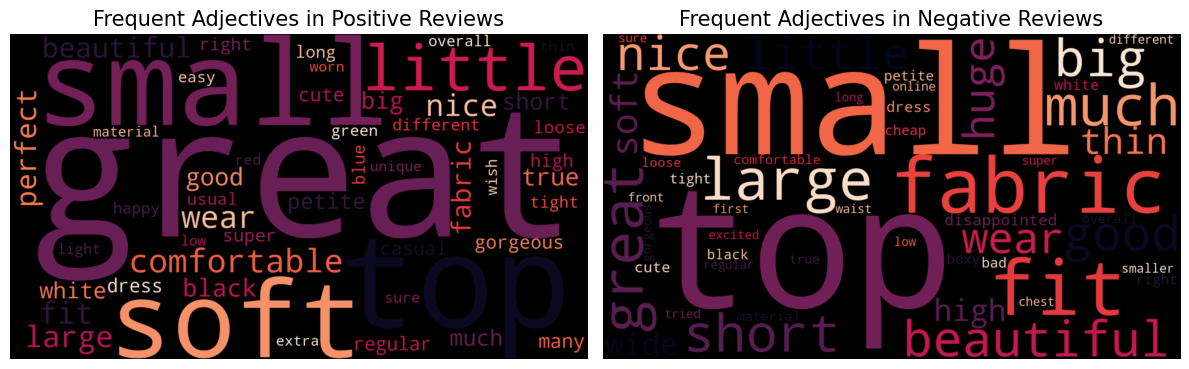

In [55]:
from nltk import FreqDist
from nltk.tag import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to extract adjectives from text
def extract_adjectives(text):
    words = text.lower().split()
    tagged_words = pos_tag(words)
    adjectives = [word for word, pos in tagged_words if pos.startswith('JJ')]
    return adjectives

# Extract adjectives from positive and negative reviews
positive_adjectives = [adj for review in positive_reviews for adj in extract_adjectives(review)]
negative_adjectives = [adj for review in negative_reviews for adj in extract_adjectives(review)]

# Calculate frequency distributions
freq_dist_positive = FreqDist(positive_adjectives)
freq_dist_negative = FreqDist(negative_adjectives)

# Get most common adjectives
most_common_positive = freq_dist_positive.most_common(50)
most_common_negative = freq_dist_negative.most_common(50)

# Generate wordcloud
positive_wordcloud = WordCloud(**param_dict_wc).generate_from_frequencies(dict(most_common_positive))
negative_wordcloud = WordCloud(**param_dict_wc).generate_from_frequencies(dict(most_common_negative))

# Display the word clouds using Matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.title("Frequent Adjectives in Positive Reviews", fontsize=15)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.title("Frequent Adjectives in Negative Reviews", fontsize=15)
plt.axis("off")

plt.tight_layout()
plt.show()


## Using Word Emdedding - Glove

## Train and Test Split

In [28]:
# Split the dataset into 80% train data and 20% test data
TRAIN_SIZE = 0.8

train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=42) 
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 18102
Test Data size 4526


## Tokenization

In [29]:
# Tokenize the dataset
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['Review Text'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

# Calculate the maximum sequence length based on the number of tokens in each sequence
sequence_lengths = [len(text_sequence.split()) for text_sequence in train_data['Review Text']]
max_sequence_length = max(sequence_lengths)

print("Vocabulary Size:", vocab_size)
print("Max Sequence Length:", max_sequence_length)

MAX_SEQUENCE_LENGTH = max_sequence_length

Vocabulary Size: 13477
Max Sequence Length: 115


In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequence the dataset so that all the reviews have same maximum word length
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['Review Text']),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['Review Text']),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (18102, 115)
Testing X Shape: (4526, 115)


In [31]:
y_train = train_data['Recommended IND']
y_test = test_data['Recommended IND']

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (18102,)
y_test shape: (4526,)


## Apply Smote

In [32]:
# Apply SMOTE with the desired number of samples

smote = SMOTE(sampling_strategy={0: 15000, 1: 15000}, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

print("Resampled X_train Shape:", x_train.shape)
print("Resampled y_train Shape:", y_train.shape)

# SMOTE TEST FOR TESTING SAKE
# Apply SMOTE with the desired number of samples

smote = SMOTE(random_state=42)
x_test, y_test = smote.fit_resample(x_test, y_test)

print("Resampled X_train Shape:", x_test.shape)
print("Resampled y_train Shape:", y_test.shape)


C:\Users\DELL\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (15000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 14846)
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (15000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 14846)
  warnings.warn(


Resampled X_train Shape: (30000, 115)
Resampled y_train Shape: (30000,)


## Word Emdedding - Glove

In [34]:
# NLP Beginner - Text Classification using LSTM | Kaggle

In [35]:
# Model parameters

LR = 1e-3
BATCH_SIZE = 128
EMBEDDING_DIM = 100
EPOCHS = 10
MODEL_PATH = 'models/best_model.hdf5'

In [36]:
GLOVE_FILE = 'glove.6B/glove.6B.100d.txt'  #GLoVe file path  
embeddings_index = {}

with open(GLOVE_FILE, encoding='utf-8') as f:  # Specify the encoding as utf-8
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        embeddings_index[word] = vector

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [37]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [38]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM ,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

## Model Training

In [39]:
# Import libraries for model training
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import SpatialDropout1D, Conv1D, MaxPooling1D, Bidirectional, GRU, Dense
from tensorflow.keras.regularizers import l2


In [40]:
# Define a function that for the LSTM base model
def base_lstm_model():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)  # Updated dense layer to 128
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [56]:
# Define a function that for the GRU base model
def base_gru_model():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = GRU(64, dropout=0.2, recurrent_dropout=0.2)(x)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)  
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)
    model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [42]:
# Define a function that for the Bi-GRU base model with a different hyperparameters
def gru_model():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Conv1D(64, 5, activation='relu')(x)
    x = Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.2))(x)  
    
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x) 
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(sequence_input, outputs)
    model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [43]:
# Define a function that for the Bi-GRU base model with a different hyperparameters
def gru_model1():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.4)(embedding_sequences)
    x = Conv1D(128, 5, activation='relu')(x)
    x = MaxPooling1D(pool_size=4)(x)
    x = Bidirectional(GRU(128, dropout=0.3, recurrent_dropout=0.3))(x)
    
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(sequence_input, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [44]:
# Define a function that for the Bi-GRU base model with a different hyperparameters
def gru_model2():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.3)(embedding_sequences)
    x = Conv1D(64, 5, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.2))(x)
    
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(sequence_input, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [45]:
# Define a function that for the Bi-LSTM base model with a different hyperparameters

def lstm_model():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Conv1D(64, 5, activation='relu')(x)
    x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
    
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(sequence_input, outputs)
    model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [46]:
def train_model(model, train_data, train_labels, test_data, test_label):
    reduce_lr = ReduceLROnPlateau(factor=0.1, min_lr=0.01, monitor='val_loss', verbose=1)
    early_stopper = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Pass the instantiated model to the callbacks
    reduce_lr.set_model(model)
    early_stopper.set_model(model)
    
    history = model.fit(train_data, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,
                        validation_data=(test_data, test_label), callbacks=[reduce_lr, early_stopper])
    
    return history

###   Model Evaluation

In [47]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam


In [48]:
# Defined a function for the evaluation loss
def evaluate_tensorflow_model(model, test_data, test_labels):
    loss, accuracy = model.evaluate(test_data, test_labels)
    return loss, accuracy

In [49]:
# Define function for classification report and confusion matrix
def generate_classification_report(predictions, test_labels):
    report = classification_report(test_labels, predictions)
    return report


def generate_confusion_matrix(predictions, test_labels):
    matrix = confusion_matrix(test_labels, predictions)
    return matrix

def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

In [50]:
# Define a function for prediction of new text review
def predict_sentiment(model, tokenizer,max_sequence_length, new_texts):
    # Make predictions
    new_sequences = tokenizer.texts_to_sequences(new_texts)
    new_padded = pad_sequences(new_sequences, maxlen=max_sequence_length)
    predictions = model.predict(new_padded)
    sentiments = ['Not Recommended' if pred < 0.5 else 'Recommended' for pred in predictions]
    polarity_scores = predictions.flatten()
    
    return sentiments, polarity_scores

## Baseline LSTM Model

In [51]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [53]:
## LSTM base model

# Build the LSTM model
Base_lstm_model = base_lstm_model()
Base_lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 115)]             0         
                                                                 
 embedding (Embedding)       (None, 115, 100)          1347700   
                                                                 
 spatial_dropout1d (SpatialD  (None, 115, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                             

In [114]:
# Train the TensorFlow model
Base_lstm_history = train_model(Base_lstm_model ,x_train, y_train, x_test, y_test)

Epoch 1/10
469/469 [==============================] - 188s 397ms/step - loss: 0.5612 - accuracy: 0.6962 - val_loss: 0.3682 - val_accuracy: 0.8354 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 188s 402ms/step - loss: 0.3725 - accuracy: 0.8373 - val_loss: 0.2845 - val_accuracy: 0.8754 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 188s 401ms/step - loss: 0.3074 - accuracy: 0.8724 - val_loss: 0.2392 - val_accuracy: 0.8930 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 188s 402ms/step - loss: 0.2786 - accuracy: 0.8850 - val_loss: 0.2393 - val_accuracy: 0.8972 - lr: 0.0010
Epoch 5/10
469/469 [==============================] - 189s 402ms/step - loss: 0.2557 - accuracy: 0.8941 - val_loss: 0.2097 - val_accuracy: 0.9084 - lr: 0.0010
Epoch 6/10
469/469 [==============================] - 188s 401ms/step - loss: 0.2447 - accuracy: 0.8976 - val_loss: 0.2243 - val_accuracy: 0.9057 - lr: 0.0010
Epoch 7/10
469/469 [==========================

In [118]:
# Evaluate the TensorFlow model
lstm_loss, lstm_accuracy = evaluate_tensorflow_model(Base_lstm_model, x_test, y_test)

231/231 [==============================] - 17s 73ms/step - loss: 0.1868 - accuracy: 0.9220


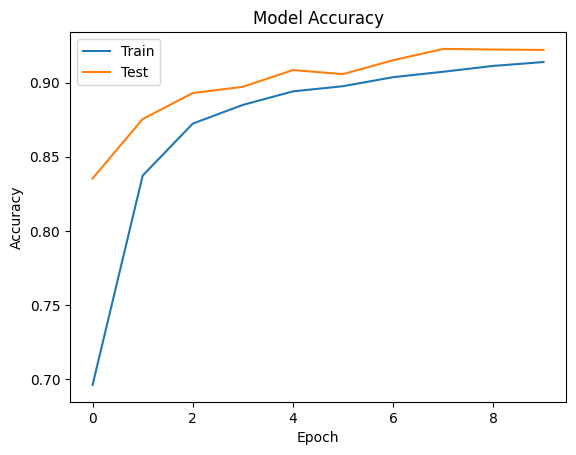

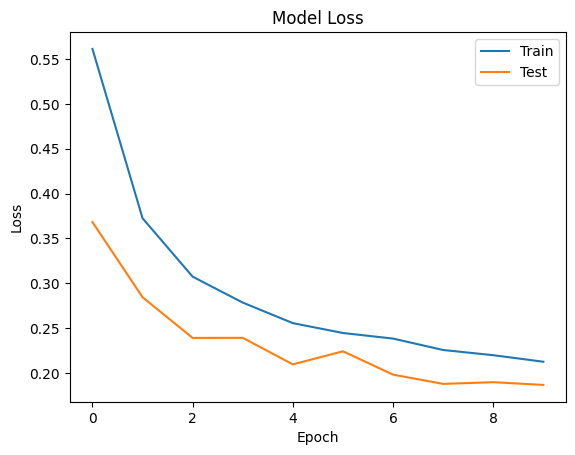

TensorFlow Model
Loss: 0.18683597445487976
Accuracy: 0.9220320582389832



In [119]:
# Plot the history of the TensorFlow model
plot_history(Base_lstm_history)

print('TensorFlow Model')
print('Loss:', lstm_loss)
print('Accuracy:', lstm_accuracy)
print()

In [120]:
Base_lstm_model.save('models/Base_lstm_model.h5')

In [121]:
predictions_lstm = Base_lstm_model.predict(x_test)  
binary_predictions_lstm = np.round(predictions_lstm)  # Round predictions for binary classification


231/231 [==============================] - 16s 70ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3681
           1       0.89      0.96      0.92      3681

    accuracy                           0.92      7362
   macro avg       0.92      0.92      0.92      7362
weighted avg       0.92      0.92      0.92      7362

Confusion Matrix:


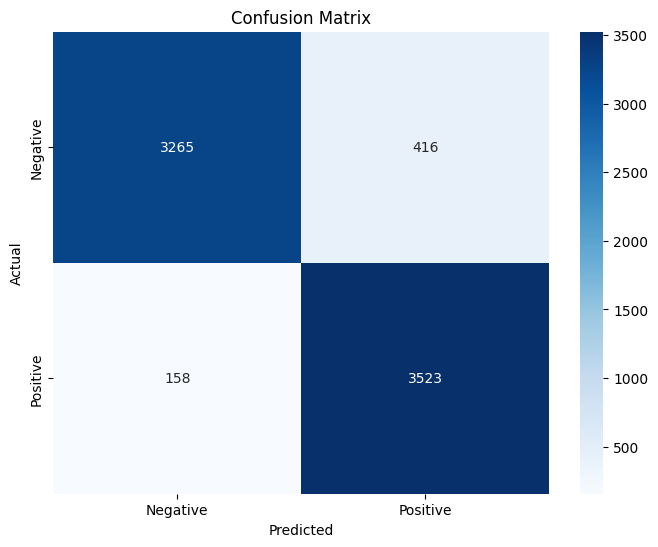

In [122]:
# Generate classification report
classification_rep = generate_classification_report(binary_predictions_lstm, y_test)
print("Classification Report:")
print(classification_rep)

# Generate confusion matrix
confusion_mat = generate_confusion_matrix(binary_predictions_lstm, y_test)
print("Confusion Matrix:")
confusion_mat
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [123]:
# Load the trained model
test_lstm_model = tf.keras.models.load_model("models/Base_lstm_model.h5")

In [124]:
# Make predictions
new_texts = ['I love my new dress', 'Not what was expected', 'petite small usual size found outrageously small ','This is a beautiful dress']
sentiments, polarity_scores = predict_sentiment(test_lstm_model,tokenizer, MAX_SEQUENCE_LENGTH, new_texts)

for text, sentiment, polarity in zip(new_texts, sentiments, polarity_scores):
    print('Text:', text)
    print('Sentiment:', sentiment)
    print('Polarity Score:', polarity)
    print()

1/1 [==============================] - 0s 146ms/step
Text: I love my new dress
Sentiment: Recommended
Polarity Score: 0.9985091

Text: Not what was expected
Sentiment: Not Recommended
Polarity Score: 0.15001892

Text: petite small usual size found outrageously small 
Sentiment: Recommended
Polarity Score: 0.6738307

Text: This is a beautiful dress
Sentiment: Recommended
Polarity Score: 0.99038357



## Bidirectional LSTM 

In [54]:
# Build the LSTM model
Lstm_model = lstm_model()
Lstm_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 115)]             0         
                                                                 
 embedding (Embedding)       (None, 115, 100)          1347700   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 115, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d (Conv1D)             (None, 111, 64)           32064     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 128)               1651

In [125]:
# Train the TensorFlow model
lstm_history = train_model(Lstm_model,x_train, y_train, x_test, y_test)

Epoch 1/10
235/235 [==============================] - 206s 844ms/step - loss: 1.0822 - accuracy: 0.6945 - val_loss: 0.4044 - val_accuracy: 0.8392 - lr: 0.0010
Epoch 2/10
235/235 [==============================] - 197s 837ms/step - loss: 0.3977 - accuracy: 0.8409 - val_loss: 0.3117 - val_accuracy: 0.8822 - lr: 0.0010
Epoch 3/10
235/235 [==============================] - 196s 836ms/step - loss: 0.3197 - accuracy: 0.8763 - val_loss: 0.3244 - val_accuracy: 0.8593 - lr: 0.0010
Epoch 4/10
235/235 [==============================] - 200s 851ms/step - loss: 0.2943 - accuracy: 0.8881 - val_loss: 0.2678 - val_accuracy: 0.9007 - lr: 0.0010
Epoch 5/10
235/235 [==============================] - 199s 846ms/step - loss: 0.2840 - accuracy: 0.8906 - val_loss: 0.2526 - val_accuracy: 0.8980 - lr: 0.0010
Epoch 6/10
235/235 [==============================] - 198s 845ms/step - loss: 0.2660 - accuracy: 0.8993 - val_loss: 0.2371 - val_accuracy: 0.9056 - lr: 0.0010
Epoch 7/10
235/235 [==========================

In [126]:
 # Evaluate the TensorFlow model
lstm_loss, lstm_accuracy = evaluate_tensorflow_model(Lstm_model, x_test, y_test)

231/231 [==============================] - 30s 130ms/step - loss: 0.2141 - accuracy: 0.9174


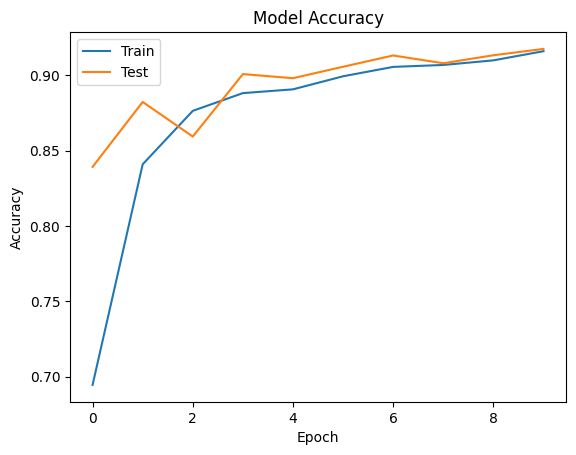

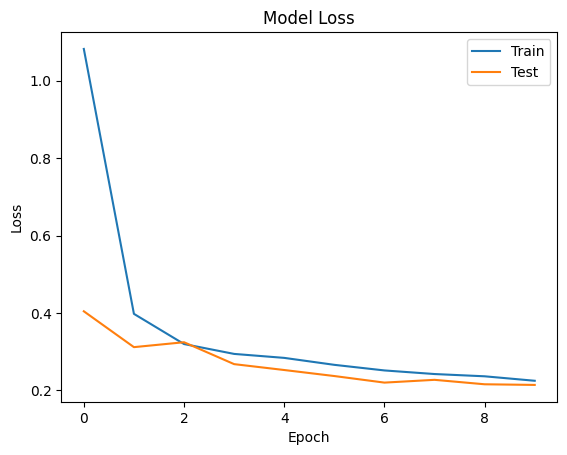

TensorFlow Model
Loss: 0.2141333818435669
Accuracy: 0.9174137711524963



In [127]:
# Plot the history of the TensorFlow model
plot_history(lstm_history)

print('TensorFlow Model')
print('Loss:', lstm_loss)
print('Accuracy:', lstm_accuracy)
print()

In [128]:
Lstm_model.save('models/lstm_model.h5')

In [129]:
predictions_lstm = Lstm_model.predict(x_test)  
binary_predictions_lstm = np.round(predictions_lstm)  # Round predictions for binary classification


231/231 [==============================] - 31s 130ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3681
           1       0.90      0.94      0.92      3681

    accuracy                           0.92      7362
   macro avg       0.92      0.92      0.92      7362
weighted avg       0.92      0.92      0.92      7362

Confusion Matrix:


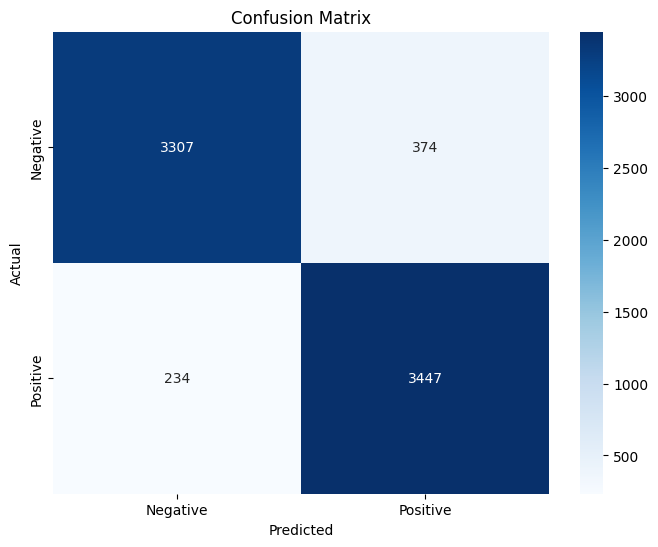

In [130]:
# Generate classification report
classification_rep = generate_classification_report(binary_predictions_lstm, y_test)
print("Classification Report:")
print(classification_rep)

# Generate confusion matrix
confusion_mat = generate_confusion_matrix(binary_predictions_lstm, y_test)
print("Confusion Matrix:")
confusion_mat
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [131]:
# Load the trained model
test_lstm_model = tf.keras.models.load_model("models/lstm_model.h5")

In [132]:
# Make predictions
new_texts = ['I love my new dress', 'Not what was expected', 'petite small usual size found outrageously small ','This is a beautiful dress']
sentiments, polarity_scores = predict_sentiment(test_lstm_model,tokenizer, MAX_SEQUENCE_LENGTH, new_texts)

for text, sentiment, polarity in zip(new_texts, sentiments, polarity_scores):
    print('Text:', text)
    print('Sentiment:', sentiment)
    print('Polarity Score:', polarity)
    print()

1/1 [==============================] - 0s 307ms/step
Text: I love my new dress
Sentiment: Recommended
Polarity Score: 0.9928133

Text: Not what was expected
Sentiment: Not Recommended
Polarity Score: 0.106497444

Text: petite small usual size found outrageously small 
Sentiment: Recommended
Polarity Score: 0.7712359

Text: This is a beautiful dress
Sentiment: Recommended
Polarity Score: 0.9766138



## Basic GRU

In [57]:
# Build the GRU model
Base_gru_model = base_gru_model()
Base_gru_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 115)]             0         
                                                                 
 embedding (Embedding)       (None, 115, 100)          1347700   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 115, 100)         0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 64)                31872     
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                           

In [133]:

# Train the TensorFlow model
Base_gru_history = train_model(Base_gru_model,x_train, y_train, x_test, y_test)

Epoch 1/10
235/235 [==============================] - 94s 392ms/step - loss: 0.5922 - accuracy: 0.6730 - val_loss: 0.4498 - val_accuracy: 0.7785 - lr: 0.0010
Epoch 2/10
235/235 [==============================] - 93s 395ms/step - loss: 0.4359 - accuracy: 0.7988 - val_loss: 0.3409 - val_accuracy: 0.8601 - lr: 0.0010
Epoch 3/10
235/235 [==============================] - 93s 396ms/step - loss: 0.3445 - accuracy: 0.8531 - val_loss: 0.2664 - val_accuracy: 0.8849 - lr: 0.0010
Epoch 4/10
235/235 [==============================] - 93s 395ms/step - loss: 0.3032 - accuracy: 0.8740 - val_loss: 0.2673 - val_accuracy: 0.8817 - lr: 0.0010
Epoch 5/10
235/235 [==============================] - 93s 396ms/step - loss: 0.2779 - accuracy: 0.8853 - val_loss: 0.2284 - val_accuracy: 0.9014 - lr: 0.0010
Epoch 6/10
235/235 [==============================] - 94s 398ms/step - loss: 0.2624 - accuracy: 0.8929 - val_loss: 0.2195 - val_accuracy: 0.9038 - lr: 0.0010
Epoch 7/10
235/235 [==============================] 

In [134]:
# Evaluate the TensorFlow model
gru_loss, gru_accuracy = evaluate_tensorflow_model(Base_gru_model, x_test, y_test)

231/231 [==============================] - 17s 72ms/step - loss: 0.1896 - accuracy: 0.9192


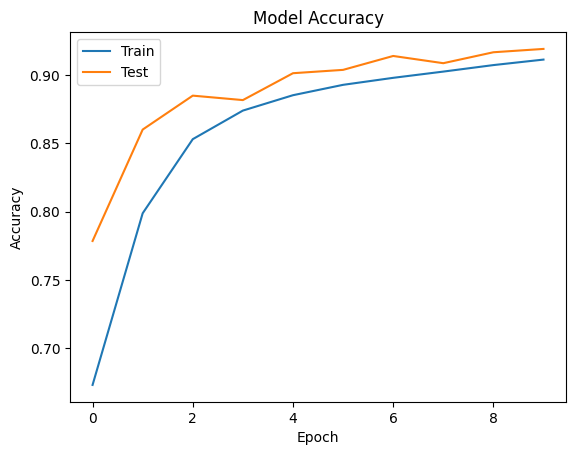

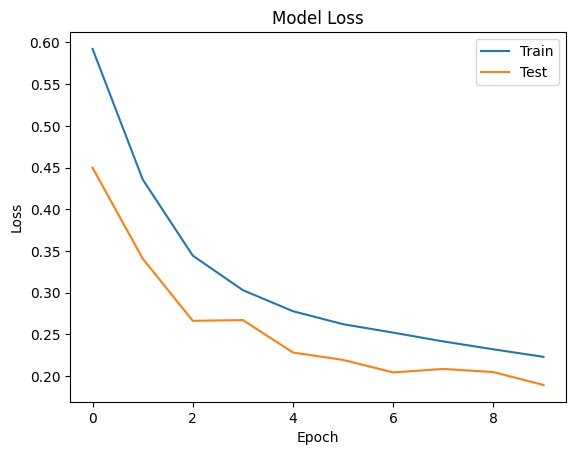

TensorFlow Model
Loss: 0.1895643025636673
Accuracy: 0.9191795587539673



In [135]:
# Plot the history of the TensorFlow model
plot_history(Base_gru_history)

print('TensorFlow Model')
print('Loss:', gru_loss)
print('Accuracy:', gru_accuracy)
print()

In [138]:
Base_gru_model.save('models/Base_gru_model.h5')

In [139]:
predictions_gru = Base_gru_model.predict(x_test)  
binary_predictions_gru = np.round(predictions_lstm)  # Round predictions for binary classification


231/231 [==============================] - 17s 71ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3681
           1       0.90      0.94      0.92      3681

    accuracy                           0.92      7362
   macro avg       0.92      0.92      0.92      7362
weighted avg       0.92      0.92      0.92      7362

Confusion Matrix:


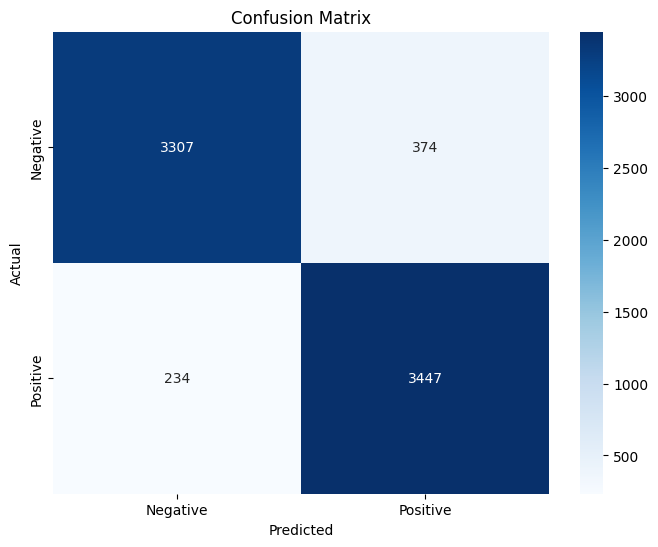

In [140]:
# Generate classification report
classification_rep_gru = generate_classification_report(binary_predictions_gru, y_test)
print("Classification Report:")
print(classification_rep_gru)

# Generate confusion matrix
confusion_mat_gru = generate_confusion_matrix(binary_predictions_gru, y_test)
print("Confusion Matrix:")
confusion_mat
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_gru, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [141]:
# Load the trained model
test_gru_model = tf.keras.models.load_model("models/Base_gru_model.h5")

In [142]:
# Make predictions
new_texts = ['I love my new dress', 'Not what was expected', 'petite small usual size found outrageously small ','This is a beautiful dress']
sentiments, polarity_scores = predict_sentiment(test_gru_model,tokenizer, MAX_SEQUENCE_LENGTH, new_texts)

for text, sentiment, polarity in zip(new_texts, sentiments, polarity_scores):
    print('Text:', text)
    print('Sentiment:', sentiment)
    print('Polarity Score:', polarity)
    print()

1/1 [==============================] - 1s 525ms/step
Text: I love my new dress
Sentiment: Recommended
Polarity Score: 0.9876171

Text: Not what was expected
Sentiment: Not Recommended
Polarity Score: 0.16179442

Text: petite small usual size found outrageously small 
Sentiment: Not Recommended
Polarity Score: 0.4697377

Text: This is a beautiful dress
Sentiment: Recommended
Polarity Score: 0.96227056



## GRU Model 

In [58]:
# Build the GRU model
Gru_model = gru_model()
Gru_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 115)]             0         
                                                                 
 embedding (Embedding)       (None, 115, 100)          1347700   
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 115, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_1 (Conv1D)           (None, 111, 64)           32064     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              49920     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 128)               1651

In [143]:
# Train the TensorFlow model
gru_history = train_model(Gru_model,x_train, y_train, x_test, y_test)

Epoch 1/10
235/235 [==============================] - 180s 756ms/step - loss: 1.1296 - accuracy: 0.6542 - val_loss: 0.4418 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 2/10
235/235 [==============================] - 177s 754ms/step - loss: 0.3708 - accuracy: 0.8572 - val_loss: 0.2912 - val_accuracy: 0.8856 - lr: 0.0010
Epoch 3/10
235/235 [==============================] - 176s 751ms/step - loss: 0.3258 - accuracy: 0.8768 - val_loss: 0.2575 - val_accuracy: 0.8957 - lr: 0.0010
Epoch 4/10
235/235 [==============================] - 177s 753ms/step - loss: 0.2839 - accuracy: 0.8931 - val_loss: 0.2423 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 5/10
235/235 [==============================] - 177s 752ms/step - loss: 0.2654 - accuracy: 0.8987 - val_loss: 0.2385 - val_accuracy: 0.9026 - lr: 0.0010
Epoch 6/10
235/235 [==============================] - 177s 752ms/step - loss: 0.2546 - accuracy: 0.9052 - val_loss: 0.2330 - val_accuracy: 0.9102 - lr: 0.0010
Epoch 7/10
235/235 [==========================

In [144]:
# Evaluate the TensorFlow model
gru_loss, gru_accuracy = evaluate_tensorflow_model(Gru_model, x_test, y_test)

231/231 [==============================] - 28s 122ms/step - loss: 0.2068 - accuracy: 0.9212


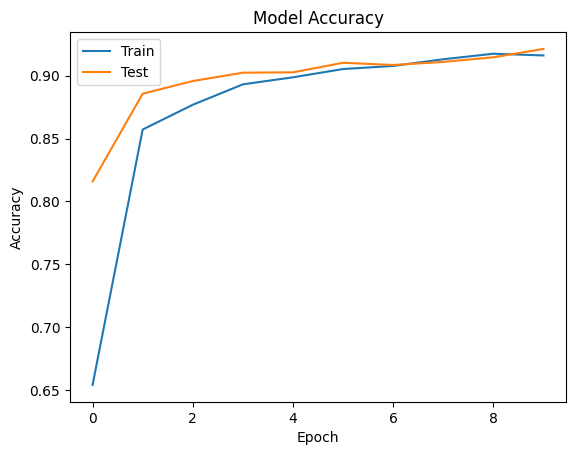

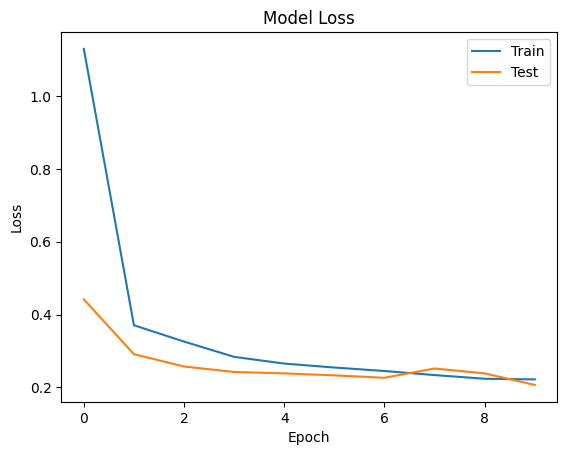

TensorFlow Model
Loss: 0.20679634809494019
Accuracy: 0.9212170839309692



In [145]:
# Plot the history of the TensorFlow model
plot_history(gru_history)

print('TensorFlow Model')
print('Loss:', gru_loss)
print('Accuracy:', gru_accuracy)
print()

In [146]:
Gru_model.save('models/gru_model.h5')

In [147]:
predictions_gru = Gru_model.predict(x_test)  
binary_predictions_gru = np.round(predictions_gru)  # Round predictions for binary classification

231/231 [==============================] - 28s 122ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3681
           1       0.90      0.95      0.92      3681

    accuracy                           0.92      7362
   macro avg       0.92      0.92      0.92      7362
weighted avg       0.92      0.92      0.92      7362

Confusion Matrix:


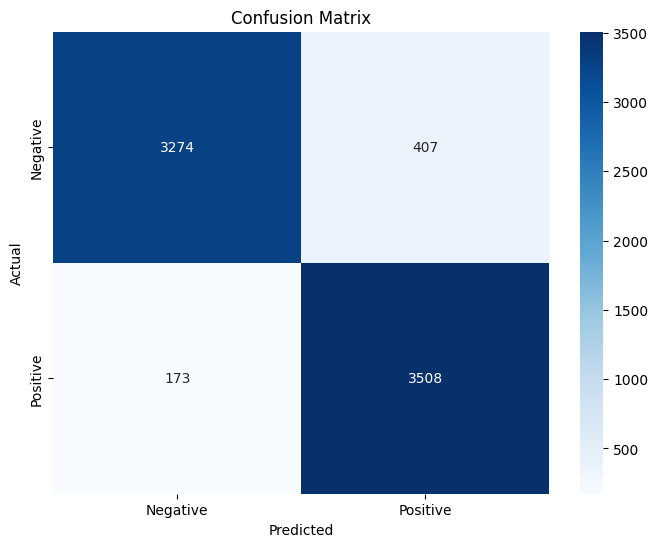

In [148]:
# Generate classification report
classification_rep_gru = generate_classification_report(binary_predictions_gru, y_test)
print("Classification Report:")
print(classification_rep_gru)

# Generate confusion matrix
confusion_mat_gru = generate_confusion_matrix(binary_predictions_gru, y_test)
print("Confusion Matrix:")
confusion_mat
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_gru, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [149]:
# Load the trained model
test_gru_model = tf.keras.models.load_model("models/gru_model.h5")

In [150]:
# Make predictions
new_texts = ['I love my new dress', 'Not what was expected', 'petite small usual size found outrageously small ','This is a beautiful dress']
sentiments, polarity_scores = predict_sentiment(test_gru_model,tokenizer, MAX_SEQUENCE_LENGTH, new_texts)

for text, sentiment, polarity in zip(new_texts, sentiments, polarity_scores):
    print('Text:', text)
    print('Sentiment:', sentiment)
    print('Polarity Score:', polarity)
    print()

1/1 [==============================] - 0s 297ms/step
Text: I love my new dress
Sentiment: Recommended
Polarity Score: 0.98500466

Text: Not what was expected
Sentiment: Not Recommended
Polarity Score: 0.14513567

Text: petite small usual size found outrageously small 
Sentiment: Recommended
Polarity Score: 0.91488034

Text: This is a beautiful dress
Sentiment: Recommended
Polarity Score: 0.9569825



## use another hyperparameters for the GRU model

## Gru_model1

In [59]:
# Build the LSTM model
Gru_model1 = gru_model1()
Gru_model1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 115)]             0         
                                                                 
 embedding (Embedding)       (None, 115, 100)          1347700   
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 115, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 111, 128)          64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 27, 128)          0         
 )                                                               
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              1981

In [151]:
# Train the TensorFlow model
gru_history1 = train_model(Gru_model1,x_train, y_train, x_test, y_test)

Epoch 1/10
235/235 [==============================] - 50s 202ms/step - loss: 0.5475 - accuracy: 0.6987 - val_loss: 0.3171 - val_accuracy: 0.8674 - lr: 0.0010
Epoch 2/10
235/235 [==============================] - 47s 199ms/step - loss: 0.3524 - accuracy: 0.8529 - val_loss: 0.2690 - val_accuracy: 0.8830 - lr: 0.0010
Epoch 3/10
235/235 [==============================] - 48s 204ms/step - loss: 0.3012 - accuracy: 0.8765 - val_loss: 0.2341 - val_accuracy: 0.8939 - lr: 0.0010
Epoch 4/10
235/235 [==============================] - 47s 200ms/step - loss: 0.2865 - accuracy: 0.8824 - val_loss: 0.2421 - val_accuracy: 0.8953 - lr: 0.0010
Epoch 5/10
235/235 [==============================] - 48s 202ms/step - loss: 0.2678 - accuracy: 0.8903 - val_loss: 0.2223 - val_accuracy: 0.9091 - lr: 0.0010
Epoch 6/10
235/235 [==============================] - 47s 202ms/step - loss: 0.2538 - accuracy: 0.8965 - val_loss: 0.2212 - val_accuracy: 0.9055 - lr: 0.0010
Epoch 7/10
235/235 [==============================] 

In [152]:
# Evaluate the TensorFlow model
gru_loss, gru_accuracy = evaluate_tensorflow_model(Gru_model1, x_test, y_test)

231/231 [==============================] - 8s 33ms/step - loss: 0.2050 - accuracy: 0.9173


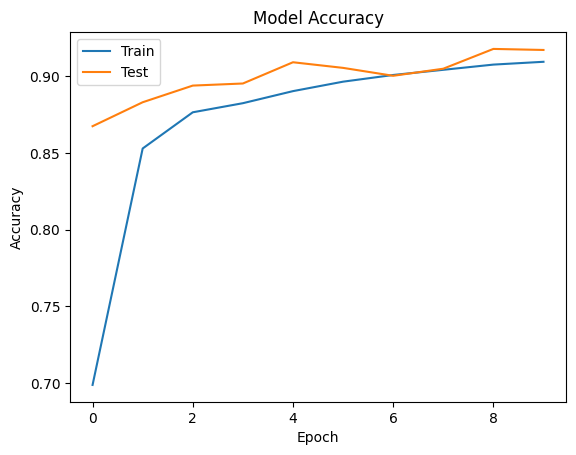

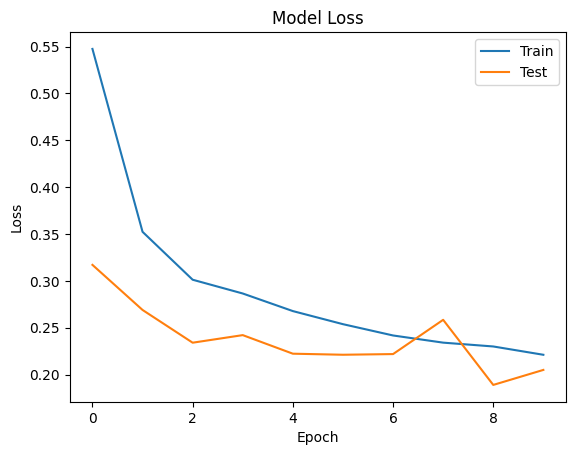

TensorFlow Model
Loss: 0.20502091944217682
Accuracy: 0.9172779321670532



In [153]:
# Plot the history of the TensorFlow model
plot_history(gru_history1)

print('TensorFlow Model')
print('Loss:', gru_loss)
print('Accuracy:', gru_accuracy)
print()

In [154]:
Gru_model1.save('models/gru_model1.h5')

In [155]:
predictions_gru = Gru_model1.predict(x_test)  
binary_predictions_gru = np.round(predictions_gru)  # Round predictions for binary classification

231/231 [==============================] - 8s 32ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3681
           1       0.88      0.96      0.92      3681

    accuracy                           0.92      7362
   macro avg       0.92      0.92      0.92      7362
weighted avg       0.92      0.92      0.92      7362

Confusion Matrix:


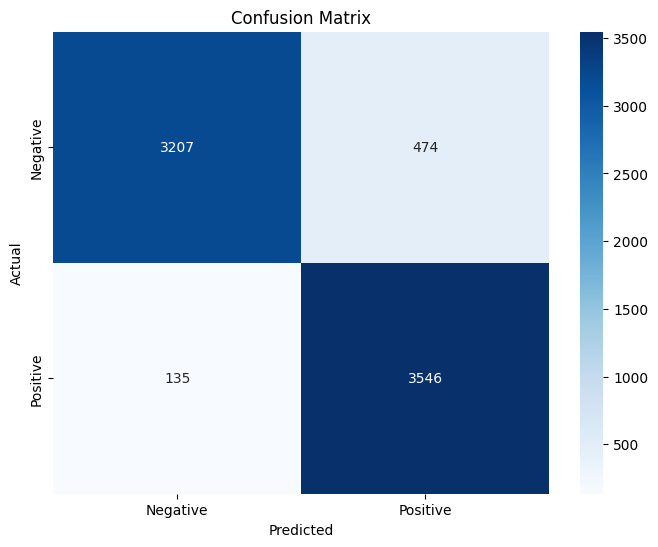

In [156]:
# Generate classification report
classification_rep_gru = generate_classification_report(binary_predictions_gru, y_test)
print("Classification Report:")
print(classification_rep_gru)

# Generate confusion matrix
confusion_mat_gru = generate_confusion_matrix(binary_predictions_gru, y_test)
print("Confusion Matrix:")
confusion_mat
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_gru, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [157]:
# Load the trained model
test_gru_model = tf.keras.models.load_model("models/gru_model1.h5")

In [158]:
# Make predictions
new_texts = ['I love my new dress', 'Not what was expected', 'petite small usual size found outrageously small ','This is a beautiful dress']
sentiments, polarity_scores = predict_sentiment(test_gru_model,tokenizer, MAX_SEQUENCE_LENGTH, new_texts)

for text, sentiment, polarity in zip(new_texts, sentiments, polarity_scores):
    print('Text:', text)
    print('Sentiment:', sentiment)
    print('Polarity Score:', polarity)
    print()

1/1 [==============================] - 0s 252ms/step
Text: I love my new dress
Sentiment: Recommended
Polarity Score: 0.9782944

Text: Not what was expected
Sentiment: Recommended
Polarity Score: 0.5695295

Text: petite small usual size found outrageously small 
Sentiment: Recommended
Polarity Score: 0.77581507

Text: This is a beautiful dress
Sentiment: Recommended
Polarity Score: 0.9491655



### Gru_model2 another hyperparameters 

In [60]:
# Build the LSTM model
Gru_model2 = gru_model2()
Gru_model2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 115)]             0         
                                                                 
 embedding (Embedding)       (None, 115, 100)          1347700   
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 115, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_3 (Conv1D)           (None, 111, 64)           32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 55, 64)           0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              4992

In [159]:
# Train the TensorFlow model
gru_history2 = train_model(Gru_model2,x_train, y_train, x_test, y_test)

Epoch 1/10
235/235 [==============================] - 93s 387ms/step - loss: 0.6095 - accuracy: 0.6481 - val_loss: 0.4504 - val_accuracy: 0.7972 - lr: 5.0000e-04
Epoch 2/10
235/235 [==============================] - 92s 394ms/step - loss: 0.3915 - accuracy: 0.8301 - val_loss: 0.3027 - val_accuracy: 0.8738 - lr: 5.0000e-04
Epoch 3/10
235/235 [==============================] - 90s 382ms/step - loss: 0.3355 - accuracy: 0.8618 - val_loss: 0.2760 - val_accuracy: 0.8849 - lr: 5.0000e-04
Epoch 4/10
235/235 [==============================] - 90s 383ms/step - loss: 0.3086 - accuracy: 0.8728 - val_loss: 0.2568 - val_accuracy: 0.8901 - lr: 5.0000e-04
Epoch 5/10
235/235 [==============================] - 90s 384ms/step - loss: 0.2961 - accuracy: 0.8764 - val_loss: 0.2461 - val_accuracy: 0.8939 - lr: 5.0000e-04
Epoch 6/10
235/235 [==============================] - 90s 383ms/step - loss: 0.2749 - accuracy: 0.8881 - val_loss: 0.2686 - val_accuracy: 0.8897 - lr: 5.0000e-04
Epoch 7/10
235/235 [========

In [160]:
# Evaluate the TensorFlow model
gru_loss, gru_accuracy = evaluate_tensorflow_model(Gru_model2, x_test, y_test)

231/231 [==============================] - 14s 62ms/step - loss: 0.2160 - accuracy: 0.9072


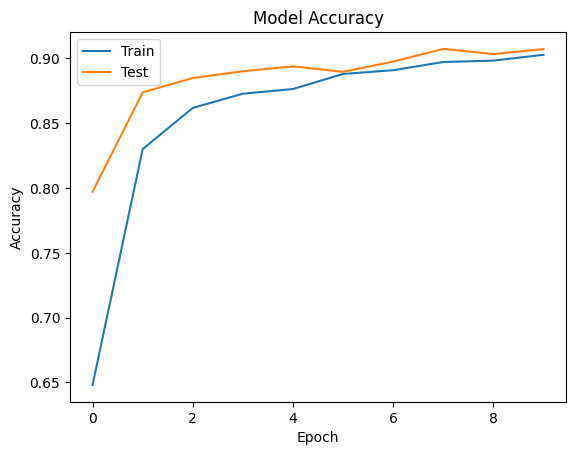

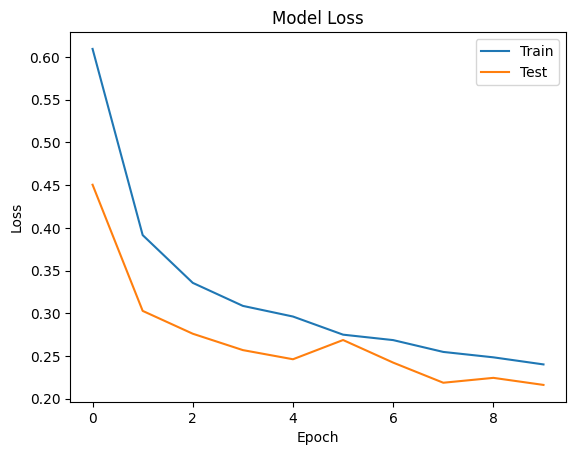

TensorFlow Model
Loss: 0.21602028608322144
Accuracy: 0.9072263240814209



In [161]:
# Plot the history of the TensorFlow model
plot_history(gru_history2)

print('TensorFlow Model')
print('Loss:', gru_loss)
print('Accuracy:', gru_accuracy)
print()

In [162]:
Gru_model2.save('models/gru_model2.h5')

In [163]:
predictions_gru = Gru_model2.predict(x_test)  
binary_predictions_gru = np.round(predictions_gru)  # Round predictions for binary classification

231/231 [==============================] - 14s 61ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3681
           1       0.86      0.97      0.91      3681

    accuracy                           0.91      7362
   macro avg       0.91      0.91      0.91      7362
weighted avg       0.91      0.91      0.91      7362

Confusion Matrix:


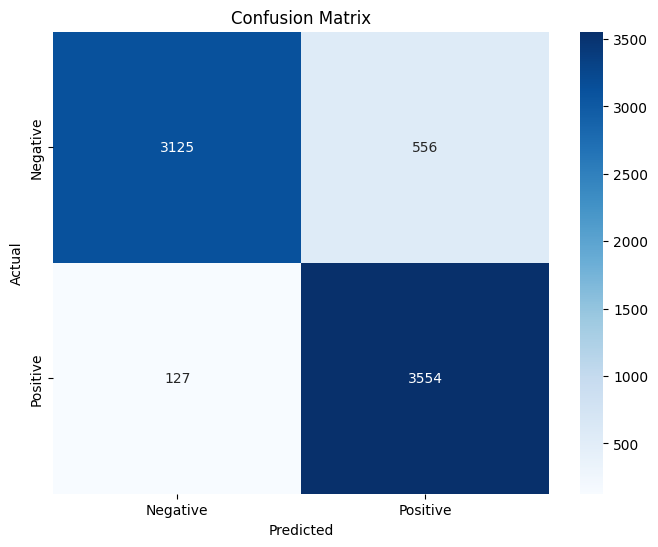

In [164]:
# Generate classification report
classification_rep_gru = generate_classification_report(binary_predictions_gru, y_test)
print("Classification Report:")
print(classification_rep_gru)

# Generate confusion matrix
confusion_mat_gru = generate_confusion_matrix(binary_predictions_gru, y_test)
print("Confusion Matrix:")
confusion_mat
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_gru, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [165]:
# Load the trained model
test_gru_model = tf.keras.models.load_model("models/gru_model2.h5")

In [166]:
# Make predictions
new_texts = ['I love my new dress', 'Not what was expected', 'petite small usual size found outrageously small ','This is a beautiful dress']
sentiments, polarity_scores = predict_sentiment(test_gru_model,tokenizer, MAX_SEQUENCE_LENGTH, new_texts)

for text, sentiment, polarity in zip(new_texts, sentiments, polarity_scores):
    print('Text:', text)
    print('Sentiment:', sentiment)
    print('Polarity Score:', polarity)
    print()

1/1 [==============================] - 0s 255ms/step
Text: I love my new dress
Sentiment: Recommended
Polarity Score: 0.9668513

Text: Not what was expected
Sentiment: Not Recommended
Polarity Score: 0.22142743

Text: petite small usual size found outrageously small 
Sentiment: Not Recommended
Polarity Score: 0.22973077

Text: This is a beautiful dress
Sentiment: Recommended
Polarity Score: 0.8880048



In [67]:
# Load the trained models
test_baselstm_model = tf.keras.models.load_model("models/Base_lstm_model.h5")
test_basegru_model = tf.keras.models.load_model("models/Base_gru_model.h5")
test_lstm_model = tf.keras.models.load_model("models/lstm_model.h5")
# test_gru_model = tf.keras.models.load_model("models/gru_model.h5")
# test_gru_model1 = tf.keras.models.load_model("models/gru_model1.h5")
test_gru_model2 = tf.keras.models.load_model("models/gru_model2.h5")
# New texts to predict
new_texts = ['I love my new dress', 'Not what was expected', 'petite small usual size found outrageously small ',
             'This is a beautiful dress','wrong size description','not good fabric'
            'I hate the dress','great dress']


# Initialize lists to store results
results = []

 

# Loop through new texts
for text in new_texts:
    # Predict sentiment using BASE LSTM model
    sentiment_baselstm, polarity_baselstm = predict_sentiment(test_baselstm_model, tokenizer, MAX_SEQUENCE_LENGTH, [text])

    # Predict sentiment using BASE LSTM model
    sentiment_basegru, polarity_basegru = predict_sentiment(test_basegru_model, tokenizer, MAX_SEQUENCE_LENGTH, [text])

    # Predict sentiment using LSTM model
    sentiment_lstm, polarity_lstm = predict_sentiment(test_lstm_model, tokenizer, MAX_SEQUENCE_LENGTH, [text])

#     # Predict sentiment using GRU model
#     sentiment_gru, polarity_gru = predict_sentiment(test_gru_model, tokenizer, MAX_SEQUENCE_LENGTH, [text])

#     # Predict sentiment using GRU model
#     sentiment_gru1, polarity_gru1 = predict_sentiment(test_gru_model1, tokenizer, MAX_SEQUENCE_LENGTH, [text])

    # Predict sentiment using GRU model
    sentiment_gru2, polarity_gru2 = predict_sentiment(test_gru_model2, tokenizer, MAX_SEQUENCE_LENGTH, [text])

    
    
    # Append results to the list
    results.append({
        'Text': text,
        'Base LSTM Sentiment': sentiment_baselstm[0],
        'Base LSTM Polarity Score': polarity_baselstm[0],
        'Base GRU Sentiment': sentiment_basegru[0],
        'Base GRU Polarity Score': polarity_basegru[0],
        'BiLSTM Sentiment': sentiment_lstm[0],
        'BiLSTM Polarity Score': polarity_lstm[0],
#         'BiGRU Sentiment': sentiment_gru[0],
#         'BiGRU Polarity Score': polarity_gru[0],
#         'BiGRU1 Sentiment': sentiment_gru1[0],
#         'BiGRU1 Polarity Score': polarity_gru1[0],
        'BiGRU2 Sentiment': sentiment_gru2[0],
        'BiGRU2 Polarity Score': polarity_gru2[0]
    })

 

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

 

# Display the DataFrame
results_df

1/1 [==============================] - 0s 45ms/step


,Text,Base LSTM Sentiment,Base LSTM Polarity Score,Base GRU Sentiment,Base GRU Polarity Score,BiLSTM Sentiment,BiLSTM Polarity Score,BiGRU2 Sentiment,BiGRU2 Polarity Score
0,I love my new dress,Recommended,0.998509,Recommended,0.987617,Recommended,0.992813,Recommended,0.966862
1,Not what was expected,Not Recommended,0.150019,Not Recommended,0.161794,Not Recommended,0.106504,Not Recommended,0.221463
2,petite small usual size found outrageously small,Recommended,0.673831,Not Recommended,0.469738,Recommended,0.771382,Not Recommended,0.229852
3,This is a beautiful dress,Recommended,0.990384,Recommended,0.962271,Recommended,0.976613,Recommended,0.887977
4,wrong size description,Not Recommended,0.199225,Not Recommended,0.216318,Not Recommended,0.151088,Not Recommended,0.421253
5,not good fabricI hate the dress,Recommended,0.898640,Not Recommended,0.403318,Not Recommended,0.419700,Not Recommended,0.395650
6,great dress,Recommended,0.992468,Recommended,0.988874,Recommended,0.978109,Recommended,0.789888


##### The Bi-GRU2 model stood out with a 91% accuracy, effectively distinguishing positive and negative sentiments. However, all models, including base LSTM, Bi-LSTM, and GRU, occasionally misclassified negative reviews as positive. 